In [4]:
import tensorflow as tf
import BHDVCS 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

func = BHDVCS.BHDVCS()

In [5]:
def chi_fit(g):
    data1 = pd.read_csv('data.csv')
    constants = np.array(data['dvcs'])[g:g+36]

    phi = np.array(data1['phi_x'])[g:g+36]
    F1 = np.array(data1['F1'])[g:g+36]
    F2 = np.array(data1['F2'])[g:g+36]

    q2 = np.array(data1['QQ'])[g:g+36]
    xb = np.array(data1['x_b'])[g:g+36]
    k = np.array(data1['k'])[g:g+36]
    t = np.array(data1['t'])[g:g+36]

    F = np.array(data1['F'])[g:g+36]
    errF = np.array(data1['errF'])[g:g+36]


    func = BHDVCS.BHDVCS()

    data1 = (phi, q2, xb, t, k, F1, F2, constants)

    params_fit, pcov = curve_fit(func.TotalUUXS_curve_fit, data1, F, sigma=errF)
    
    return params_fit

In [6]:
data = pd.read_csv('data.csv')

reh = np.array(data['ReH']).transpose()
ree = np.array(data['ReE']).transpose()
reht = np.array(data['ReHtilde']).transpose()

cff = np.concatenate((reh, ree, reht), axis=0)

g = 14
constants = np.array(data['dvcs'])[0:36*g+36]

phi = np.array(data['phi_x'])[0:36*g+36]
F1 = np.array(data['F1'])[0:36*g+36]
F2 = np.array(data['F2'])[0:36*g+36]

q2 = np.array(data['QQ'])[0:36*g+36]
xb = np.array(data['x_b'])[0:36*g+36]
k = np.array(data['k'])[0:36*g+36]
t = np.array(data['t'])[0:36*g+36]

tmean = np.mean(t)

F = np.array(data['F'])[0:36*g+36]
errF = np.array(data['errF'])[0:36*g+36]

data = data.drop(columns=['#Set','index','F','errF','ReH','ReE','ReHtilde'])

cols = ['phi_x', 'QQ', 'x_b', 't', 'k', 'F1', 'F2', 'dvcs']

data = data.reindex(columns=cols)



In [7]:
def los(y_true, y_pred):
    try:
        a = np.where(reh == y_true[0].numpy())
        b = np.where(ree == y_true[1].numpy())
        c = np.where(reht == y_true[2].numpy())
        g = (a and b and c)[0][0]+1
    except:
        g = 0
    
    dat = data[g:g+1].to_numpy().transpose()    
    
    
    j = 0
    tot = 0
    for i in range(0,360,10):
        dat[0] = i
        tot += abs(func.TotalUUXS_curve_fit(dat, y_true[0], y_true[1], y_true[2])-func.TotalUUXS_curve_fit(dat, y_pred[0], y_pred[1], y_pred[2]))/errF[g]
        j+=1
    
    
    
    return (((pErr(y_pred[0], y_true[0]) + pErr(y_pred[1], y_true[1]) +pErr(y_pred[2], y_true[2]))/errF[g])**2)*((tot/errF[g])**2)

In [8]:
x_data = pd.read_csv('data.csv')
y_data = pd.read_csv('data.csv')
#,'dvcs'
#k,QQ,x_b,t,phi_x,F,errF,F1,F2,dvcs
x_data = x_data.drop(columns=['#Set','index','F','errF','ReH','ReE','ReHtilde','phi_x', 'F1', 'F2', 'dvcs'])
y_data = y_data.drop(columns=['#Set','index','k','QQ','x_b','phi_x','F','errF','F1','F2','dvcs'])


x_group_1 = x_data[x_data['t'] < tmean]
x_group_2 = x_data[x_data['t'] > tmean]


y_group_1 = y_data[y_data['t'] < tmean]
y_group_1 = y_group_1.drop(columns=['t'])

y_group_2 = y_data[y_data['t'] > tmean]
y_group_2 = y_group_2.drop(columns=['t'])



x1 = pd.DataFrame(x_group_1.loc[0:36*g+36:36]).to_numpy()
y1 = pd.DataFrame(y_group_1.loc[0:36*g+36:36]).to_numpy()
x2 = pd.DataFrame(x_group_2.loc[0:36*g+36:36]).to_numpy()
y2 = pd.DataFrame(y_group_2.loc[0:36*g+36:36]).to_numpy()



x = pd.DataFrame(x_data.loc[0:36*g+36:36]).to_numpy()
y = pd.DataFrame(y_data.loc[0:36*g+36:36]).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

iters = x_test.ndim

x_train, x_test, y_train,y_test = x_train / 255.0, x_test / 255.0,y_train / 255.0, y_test / 255.0

x = x/255.0
y = y/255.0

x1 = x1/255.0
y1 = y1/255.0
x2 = x2/255.0
y2 = y2/255.0

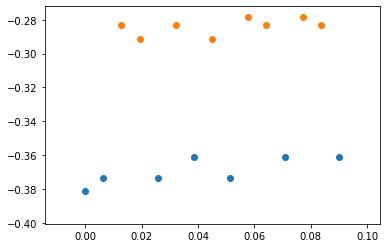

In [9]:
X = np.array((np.linspace(0,.09,15).transpose(),t[0: 36*g+36: 36].transpose())).T

# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot

# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [10]:
def pErr(a, b):
    return abs((a - b)/ (b))

In [11]:
print(x1[4:x1.size])


model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(4,)))

model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.Dense(32, activation='tanh'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))


model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.Dense(32, activation='tanh'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.Dense(32, activation='tanh'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))

model.add(tf.keras.layers.Dense(3))

model.compile(optimizer='adam', loss=los)

model.fit(x1[4:x1.size], y1[4:x1.size], epochs=1000)

arr1 = model.predict(x1[:4])*255.0

[[ 0.02254902  0.00798612  0.00162966 -0.00146469]
 [ 0.02647059  0.01032384  0.00135299 -0.00141642]
 [ 0.03039216  0.01032384  0.00135299 -0.00141642]]
Epoch 1/1000
1/1 [==============================] - 0s 997us/step - loss: 71044589158400.0000
Epoch 2/1000
1/1 [==============================] - 0s 1000us/step - loss: 50442247602176.0000
Epoch 3/1000
1/1 [==============================] - 0s 997us/step - loss: 18061941800960.0000
Epoch 4/1000
1/1 [==============================] - 0s 997us/step - loss: 813782859776.0000
Epoch 5/1000
1/1 [==============================] - 0s 997us/step - loss: 2270202953728.0000
Epoch 6/1000
1/1 [==============================] - 0s 994us/step - loss: 12286585470976.0000
Epoch 7/1000
1/1 [==============================] - 0s 999us/step - loss: 1661309812736.0000
Epoch 8/1000
1/1 [==============================] - 0s 999us/step - loss: 740685971456.0000
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 159277531136.0000
Epoch 10/

In [12]:
print(x2[5:x2.size])
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(4,)))

model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.Dense(32, activation='tanh'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))


model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.Dense(32, activation='tanh'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.Dense(32, activation='tanh'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))



model.add(tf.keras.layers.Dense(3))


model.compile(optimizer='adam', loss=los)
model.fit(x2[5:x2.size], y2[5:x2.size], epochs=1000)

arr2 = model.predict(x2[0:5])*255.0

[[ 0.02647059  0.00854725  0.00151207 -0.00111105]
 [ 0.03039216  0.00764988  0.00141502 -0.0010929 ]
 [ 0.03039216  0.00854725  0.00151207 -0.00111105]]
Epoch 1/1000
1/1 [==============================] - 0s 998us/step - loss: 56049008640000.0000
Epoch 2/1000
1/1 [==============================] - 0s 997us/step - loss: 33955875127296.0000
Epoch 3/1000
1/1 [==============================] - 0s 0s/step - loss: 8878902214656.0000
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 42175696896.0000
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 5554357403648.0000
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 4069555175424.0000
Epoch 7/1000
1/1 [==============================] - 0s 997us/step - loss: 2118132039680.0000
Epoch 8/1000
1/1 [==============================] - 0s 999us/step - loss: 39104376832.0000
Epoch 9/1000
1/1 [==============================] - 0s 998us/step - loss: 13884816384.0000
Epoch 10/1000
1/1 [===

In [13]:
def graph_fit(reh, ree, reht, g):
    curve_fit_points = []
    data2 = pd.read_csv('data.csv')
    dvcs = np.array(data['dvcs'])[g:g+36]

    phi = np.array(data2['phi_x'])[g:g+36]
    F1 = np.array(data2['F1'])[g:g+36]
    F2 = np.array(data2['F2'])[g:g+36]

    q2 = np.array(data2['QQ'])[g:g+36]
    xb = np.array(data2['x_b'])[g:g+36]
    k = np.array(data2['k'])[g:g+36]
    t = np.array(data2['t'])[g:g+36]

    F = np.array(data2['F'])[g:g+36]
    errF = np.array(data2['errF'])[g:g+36]

    for p in range(0, 36):
                  
        pars = [q2[p], xb[p], t[p], k[p], reh, ree, reh, ree, reht, dvcs[p]]
        angle = [phi[p]]
        curve_fit_points.append(func.TotalUUXS(angle, pars)) 
      
    plt.plot(phi, curve_fit_points, 'r--', alpha=0.5, label='Curve Fit') # plot the raw data
    plt.errorbar(phi, F, errF,  None, 'bo', label='t={0} x_b={1} Q={2}'.format(t[0],xb[0], q2[0]), alpha=0.8) # plot the raw data
    plt.xlabel('X value')
    plt.ylabel('Observables')
    plt.legend()
    plt.show()

Errors Set  0 :
Set 1
Real  ReH 13.0554 ReE -53.0554 ReHT 7.253019999999999
Predicted ReH 11.958167 ReE -51.98186 ReHT 6.67944
 
Chi  ReH 0.06306624460049916 ReE 0.08157402621155244 ReHT 0.062496882532626315
ML  ReH 0.08404437427341642 ReE 0.02023430009948178 ReHT 0.07908153823994789
 
ERROR Greater than 5%


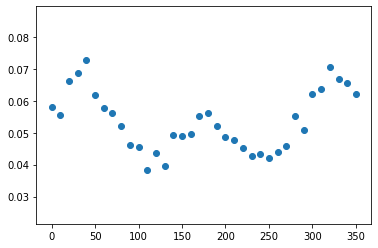

Errors Set  1 :
Set 1
Real  ReH 12.5549 ReE -52.5549 ReHT 6.974939999999999
Predicted ReH 11.956773 ReE -51.976387 ReHT 6.678872
 
Chi  ReH 0.06651456236466628 ReE 0.09149851077187778 ReHT 0.07356328618281023
ML  ReH 0.04764093666534549 ReE 0.011007783785607473 ReHT 0.04244737467856736
 


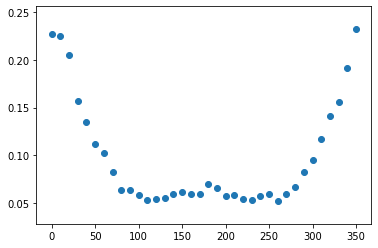

Errors Set  2 :
Set 1
Real  ReH 12.5549 ReE -52.5549 ReHT 6.974939999999999
Predicted ReH 11.947499 ReE -51.983498 ReHT 6.671463
 
Chi  ReH 0.06651456236466628 ReE 0.09149851077187778 ReHT 0.07356328618281023
ML  ReH 0.04837957489047945 ReE 0.01087248535095866 ReHT 0.043509619768010446
 


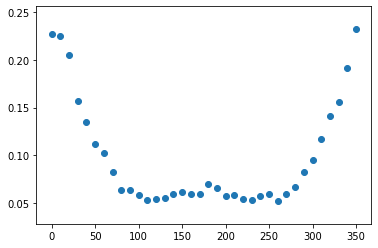

Errors Set  3 :
Set 1
Real  ReH 11.7411 ReE -51.7411 ReHT 6.52283
Predicted ReH 11.929867 ReE -51.96305 ReHT 6.659504
 
Chi  ReH 0.133712546061349 ReE 0.17175076477240778 ReHT 0.06574362138474582
ML  ReH 0.016077436592098267 ReE 0.004289642900617754 ReHT 0.0209531655382063
 


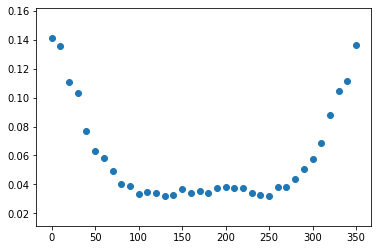

Errors Set  4 :
Set 2
Real  ReH 7.224239999999999 ReE -47.2242 ReHT 4.01347
Predicted ReH 7.2303615 ReE -47.0857 ReHT 3.992055
 
Chi  ReH 0.09459516432642315 ReE 0.08530219227052974 ReHT 0.11741215571979306
ML  ReH 0.00084735025959896 ReE 0.002932797405365724 ReHT 0.005335796886479864
 


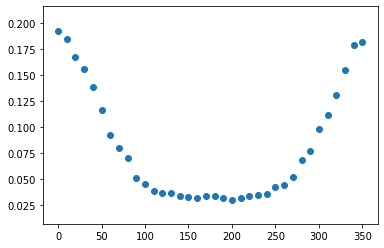

Errors Set  5 :
Set 2
Real  ReH 7.6527199999999995 ReE -47.6527 ReHT 4.25151
Predicted ReH 7.230125 ReE -47.08664 ReHT 3.9920492
 
Chi  ReH 0.17371803363555113 ReE 0.14339344015608185 ReHT 0.06222013051317005
ML  ReH 0.05522154862468037 ReE 0.011878877706890226 ReHT 0.06102791308873285
 
ERROR Greater than 5%


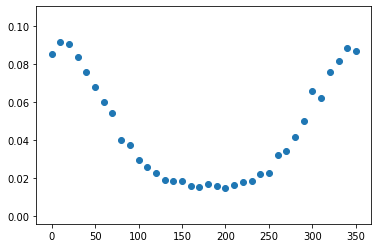

Errors Set  6 :
Set 2
Real  ReH 7.224239999999999 ReE -47.2242 ReHT 4.01347
Predicted ReH 7.2270384 ReE -47.096416 ReHT 3.9900324
 
Chi  ReH 0.09459516432642315 ReE 0.08530219227052974 ReHT 0.11741215571979306
ML  ReH 0.0003873602598872148 ReE 0.0027058907638738486 ReHT 0.005839726106461216
 


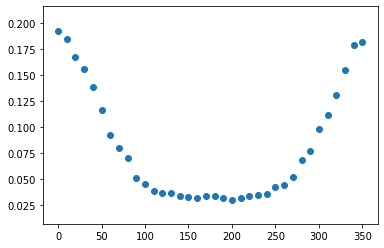

Errors Set  7 :
Set 2
Real  ReH 7.6527199999999995 ReE -47.6527 ReHT 4.25151
Predicted ReH 7.226796 ReE -47.097496 ReHT 3.990011
 
Chi  ReH 0.17371803363555113 ReE 0.14339344015608185 ReHT 0.06222013051317005
ML  ReH 0.05565653124542385 ReE 0.011651049516295177 ReHT 0.06150732873934622
 
ERROR Greater than 5%


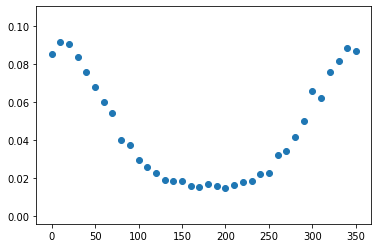

Errors Set  8 :
Set 2
Real  ReH 6.990139999999999 ReE -46.9901 ReHT 3.88341
Predicted ReH 7.2231703 ReE -47.10818 ReHT 3.9876187
 
Chi  ReH 0.15874056300793457 ReE 0.14041970013674088 ReHT 0.1869459034547019
ML  ReH 0.03333699760756489 ReE 0.0025128910080178843 ReHT 0.02683432467050266
 


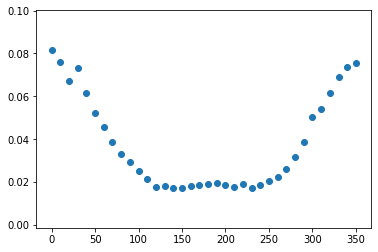

In [15]:
p, d = 0, 0
errReh = np.zeros(9)
errRee = np.zeros(9)
errReht = np.zeros(9)

for i in range(0, 9):#iters):
    
    print("Errors Set ", i,":" )
    try:
        a = np.where(reh == y1[p][0]*255)
        b = np.where(ree == y1[p][1]*255)
        c = np.where(reht == y1[p][2]*255)
        g = (a and b and c)[0][0]
        
        params_fit = chi_fit(g)
        
        reh_chi = pErr(params_fit[0], y1[p][0]*255)
        ree_chi = pErr(params_fit[1], y1[p][1]*255)
        reht_chi = pErr(params_fit[2], y1[p][2]*255)
        
        reh_ml = pErr(arr1[p][0], y1[p][0]*255)
        ree_ml = pErr(arr1[p][1], y1[p][1]*255)
        reht_ml = pErr(arr1[p][2], y1[p][2]*255)
        print("Set 1")
        print("Real  ReH", (y1[p][0]*255), "ReE", (y1[p][1]*255), "ReHT", (y1[p][2]*255))
        print("Predicted ReH", arr1[p][0], "ReE", arr1[p][1], "ReHT", arr1[p][2] )
        
        p = p+1
    except:
        a = np.where(reh == y2[d][0]*255)
        b = np.where(ree == y2[d][1]*255)
        c = np.where(reht == y2[d][2]*255)
        g = (a and b and c)[0][0]
        
        params_fit = chi_fit(g)
        
        reh_chi = pErr(params_fit[0] , y2[d][0]*255)
        ree_chi = pErr(params_fit[1] , y2[d][1]*255)
        reht_chi = pErr(params_fit[2] , y2[d][2]*255)
        
        reh_ml = pErr(arr2[d][0], y2[d][0]*255)
        ree_ml = pErr(arr2[d][1], y2[d][1]*255)
        reht_ml = pErr(arr2[d][2], y2[d][2]*255)
        
        print("Set 2")
        print("Real  ReH", (y2[d][0]*255), "ReE", (y2[d][1]*255), "ReHT", (y2[d][2]*255))
        print("Predicted ReH", arr2[d][0], "ReE", arr2[d][1], "ReHT", arr2[d][2] )
        
        d=d+1

    print(" ")
    print("Chi  ReH", abs(reh_chi), "ReE", abs(ree_chi), "ReHT", abs(reht_chi))
    print("ML  ReH", abs(reh_ml), "ReE", abs(ree_ml), "ReHT", abs(reht_ml))
    print(" ")
    
    errReh[i] = reh_ml
    errRee[i] = ree_ml
    errReht[i] = reht_ml
    
    if abs((reh_ml) > 0.05) or (abs(ree_ml) > 0.05) or (abs(reht_ml) > 0.05):
        print("ERROR Greater than 5%")
    
    data1 = pd.read_csv('data.csv')
    phi = np.array(data1['phi_x'])[g:g+36]
    F = np.array(data1['F'])[g:g+36]
    errF = np.array(data1['errF'])[g:g+36]
    
    plt.scatter(phi, F)#, errF)
    plt.show()

In [18]:
print("Varience in ReH error",np.var(errReh))
print("Varience in ReE error",np.var(errRee))
print("Varience in ReHT error",np.var(errReht))

Varience in ReH error 0.00069182849024703
Varience in ReE error 3.209067011063037e-05
Varience in ReHT error 0.0005927689373283539
